In [1]:
# Importing required libaries for data analysis
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

#Create Dataframe using pandas and excel data and set the display max coulmn as 100
pd.pandas.set_option('display.max_columns', 100)
filepath="F:\upGrade_classes\LendingClubCaseStudy\loan\loan.csv"
dfLoan = pd.read_csv(filepath, low_memory=False)

# check shape & info of loan data
print("Loan dataset shape : " , dfLoan.shape)

#view the dataframe
dfLoan.head(2)

Loan dataset shape :  (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# check for info and description of dataset
print("Loan dataset info : ",dfLoan.info)
print("\nLoan dataset description : ",dfLoan.describe())

Loan dataset info :  <bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B  

In [3]:
# Check for duplicate rows in dataset based on member_id column
#print(dfLoan.duplicated(subset=None, keep='first').count())
dtDuplicate= dfLoan[dfLoan.duplicated(['member_id'])]
print("Loan dataset dublicate Info : " , dtDuplicate.sum())

Loan dataset dublicate Info :  id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
                             ... 
tax_liens                     0.0
tot_hi_cred_lim               0.0
total_bal_ex_mort             0.0
total_bc_limit                0.0
total_il_high_credit_limit    0.0
Length: 111, dtype: float64


In [4]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(dfLoan.isnull().all(axis=1).sum())

# sum it up to check how many columns have all missing values
print('Number of empty Columns:')
print(dfLoan.isnull().all(axis=0).sum())
print("Loan Dataset Shape is :",dfLoan.shape)

Number of empty Rows:
0
Number of empty Columns:
54
Loan Dataset Shape is : (39717, 111)


In [5]:
# Data cleaning
# print Which columns have how many null values
dfLoan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Drop additional columns we don't need these as these have only null values
null_value_column_list=dfLoan.columns[dfLoan.isnull().all()]
print("Columns with all values as null are : ",null_value_column_list)
dfLoan.drop(labels = null_value_column_list, axis = 1, inplace=True)

# sum it up to check how many columns have all missing values after deleting the null value columns
print('Number of empty Columns:')
print(dfLoan.isnull().all(axis=0).sum())

# checked the dataset updated shape.
print("Loan Dataset Shape is :",dfLoan.shape)

Columns with all values as null are :  Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num

In [7]:
#delete the columns with zeros values only 
zero_value_column=dfLoan.columns[(dfLoan==0).all()]
print("Columns with all values as zero are :",zero_value_column)
dfLoan.drop(labels = zero_value_column, axis =1, inplace=True)

# checked the dataset updated shape.
print("Loan Dataset Shape is :",dfLoan.shape)

Columns with all values as zero are : Index(['acc_now_delinq', 'delinq_amnt'], dtype='object')
Loan Dataset Shape is : (39717, 55)


In [8]:
#calculate the zero value percentage in each column
print("Percentange of zero values in each columns")
(dfLoan==0).mean().round(4)*100

Percentange of zero values in each columns


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.32
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      0.00
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                           0.00
purpose                        0.00
title                          0.00
zip_code                       0.00
addr_state                     0.00
dti                            0.46
delinq_2yrs                   89.14
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
#calculate the percentage of missing value in each column
print("Percentange of na values in each columns")
dfLoan.isna().mean().round(4)*100

Percentange of na values in each columns


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [10]:
#delete the columns which has high percentage(>80) of zero values
columns_higher_percentage_zero_value=dfLoan.columns[((dfLoan==0).mean().round(4)*100)>80]
print("Columns with higher zero values percentage : ",columns_higher_percentage_zero_value)
dfLoan.drop(labels = columns_higher_percentage_zero_value, axis =1, inplace=True)

# checked the dataset updated shape.
print("Loan Dataset Shape is :",dfLoan.shape)

Columns with higher zero values percentage :  Index(['delinq_2yrs', 'pub_rec', 'out_prncp', 'out_prncp_inv',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
Loan Dataset Shape is : (39717, 44)


In [11]:
#delete the columns which has high percentage(>50) of null values
columns_higher_percentage_null_value=dfLoan.columns[(dfLoan.isna().mean().round(4)*100)>50]
print("Columns with higher zero values percentage : ",columns_higher_percentage_null_value)
dfLoan.drop(labels = columns_higher_percentage_null_value, axis =1, inplace=True)

# checked the dataset updated shape.
print("Loan Dataset Shape is :",dfLoan.shape)

Columns with higher zero values percentage :  Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')
Loan Dataset Shape is : (39717, 41)


In [12]:
#All the column names with single value and drop it
single_value_column_list=dfLoan.columns[(dfLoan.astype('object').describe(include='all').loc['unique', :])==1]
print("Columns with single value are :",single_value_column_list)
dfLoan.drop(labels = single_value_column_list, axis =1, inplace=True)

# checked the dataset updated shape.
print("Loan Dataset Shape is :",dfLoan.shape)

Columns with single value are : Index(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type'], dtype='object')
Loan Dataset Shape is : (39717, 37)


In [13]:
# Drop additional columns we don't need these as these are customer behavioural variables.
columns_drop_list2 = ["earliest_cr_line","inq_last_6mths","open_acc","revol_bal","revol_util","total_acc","total_pymnt","total_pymnt_inv"
,"total_rec_prncp","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","total_rec_int"]
dfLoan.drop(labels = columns_drop_list2, axis =1, inplace=True)
print("customer behavioural variables columns are :",columns_drop_list2)

# checked the dataset updated shape.
print("Loan Dataset Shape is :",dfLoan.shape)


customer behavioural variables columns are : ['earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'total_rec_int']
Loan Dataset Shape is : (39717, 24)


In [14]:
# Drop additional columns we don't need as these are unnecessary details
columns_drop_list3 = ["member_id","url","desc"]
dfLoan.drop(labels = columns_drop_list3, axis =1, inplace=True)

# checked the dataset updated shape.
print("Loan Dataset Shape is :",dfLoan.shape)

Loan Dataset Shape is : (39717, 21)


In [15]:
# Calculate the all values occurance in emp_title 
dfLoan.emp_title.value_counts()
# updating all null values with value which has higher occurance
dfLoan.emp_title.fillna('US Army',inplace=True)


In [16]:
#calculate the null value percentile in each column
dfLoan.isna().mean().round(4)*100

id                     0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
zip_code               0.00
addr_state             0.00
dti                    0.00
dtype: float64

In [17]:
#print the column names after removing unnecessary columns
availableColumns=dfLoan.columns
print("Available columns :",availableColumns)

# checked the dataset updated shape.
print("Loan Dataset Shape is :",dfLoan.shape)

Available columns : Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti'],
      dtype='object')
Loan Dataset Shape is : (39717, 21)


In [18]:
# format employment length column to have only numbers.
dfLoan.emp_length.fillna('0',inplace=True)
dfLoan['emp_length'] = dfLoan.emp_length.str.extract('(\d+)')
dfLoan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,US Army,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00


In [19]:
# remove % symbol from intrest rate column to use it in analysis
dfLoan['int_rate'] = dfLoan['int_rate'].str.rstrip('%')
dfLoan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00


In [20]:
# remove months text from term column to use it in analysis
dfLoan['term'] = dfLoan.term.str.extract('(\d+)')
dfLoan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00


In [21]:
# convert amount columns into numeric data to find some correlation among important ones.

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length', 'term']
dfLoan[cols1] = dfLoan[cols1].apply(pd.to_numeric)

# delete the current loan records(Suggested in live sessions by tutor)
loanstatus=['Current']
dfLoan=dfLoan.loc[~dfLoan['loan_status'].isin(loanstatus)]
dfLoan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20


In [22]:
# loan status in total loans issued
(dfLoan.loan_status.value_counts()*100)/len(dfLoan)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [23]:
# purpose of loan in total loans issued
(dfLoan.purpose.value_counts()*100)/len(dfLoan)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

In [24]:
# Derived columns
# derive some new columns using existing data.
# create month and year columns separately using issue_d column data

dfLoan.issue_d = pd.to_datetime(dfLoan.issue_d, format='%b-%y')
dfLoan['year'] = dfLoan['issue_d'].dt.year
dfLoan['month'] = dfLoan['issue_d'].dt.month

print("dataframe details after adding the new derived columns :")
dfLoan.head()

dataframe details after adding the new derived columns :


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,year,month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,2011,12
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,2011,12
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,2011,12
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,2011,12
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,2011,12


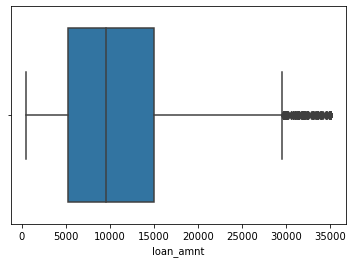

In [25]:
# Quantitative Variables-loan amount box plot
sns.boxplot(dfLoan.loan_amnt)
plt.show()

In [26]:
# Loan Amount: following calculation is used to get the upper and lower limit for outliers 
#1.IQR=UpperLimit(75%)-lowerLimit(25%) = 9700
#2.lower whiskers:-lower_limit(25%)-(1.5*IQR) = -9250.0
#3.outerWhiskers:-upperLimit(75%)+(1.5*IQR) = 29550.0
Q3, Q1 = np.percentile(dfLoan['loan_amnt'], [75 ,25])
IQR = Q3 - Q1
print("IQR is :",IQR)
upperlimit = Q3 + 1.5*IQR
lowerlimit = Q1 - 1.5*IQR
print("Upperlimit of outliers is :",upperlimit)
print("Lowerlimit of outliers is :",lowerlimit)
#remove outliers(Not to remove ,suggested in doubt sessions)
#dfLoan = dfLoan[(dfLoan.loan_amnt <= upperlimit) & (dfLoan.loan_amnt >= lowerlimit)] 
dfLoan.describe()

IQR is : 9700.0
Upperlimit of outliers is : 29550.0
Lowerlimit of outliers is : -9250.0


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,year,month
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000
mean,6.763787e+05,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,4.925526,6.877797e+04,13.272727,2010.309070,7.114757
std,2.092639e+05,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,3.453921,6.421868e+04,6.673044,0.882658,3.408523
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,2007.000000,1.000000
25%,5.120330e+05,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,2010.000000,4.000000
50%,6.564230e+05,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,2011.000000,7.000000
75%,8.291460e+05,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,2011.000000,10.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,2011.000000,12.000000


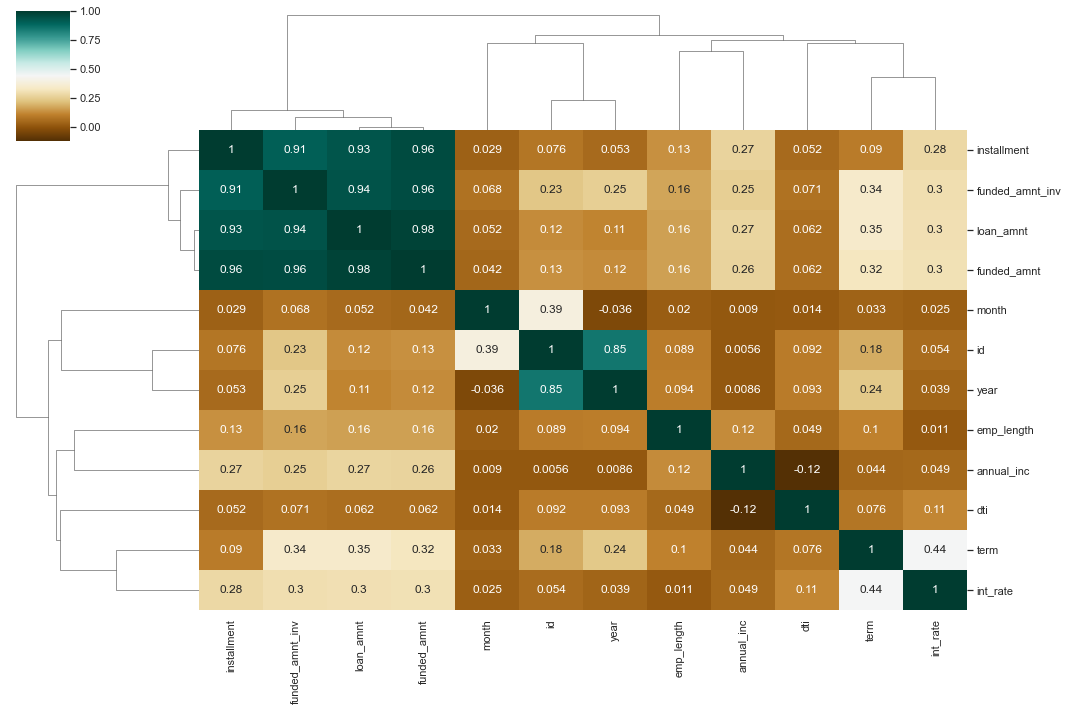

In [27]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_correlation = dfLoan.corr()
sns.set(font_scale=1.0)
sns.clustermap(loan_correlation,annot=True,figsize=(15, 10),cmap="BrBG")
plt.show()

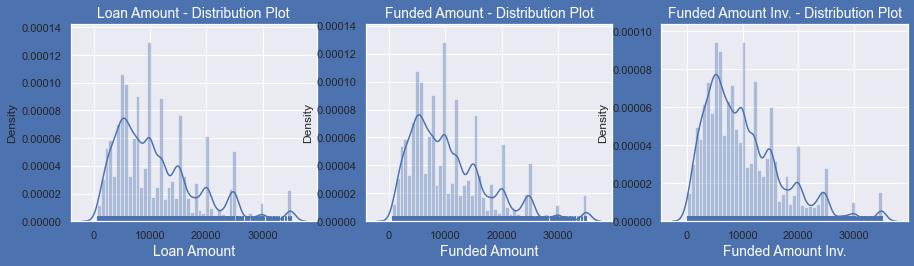

In [28]:
# distribution of three loan amount fields using distribution plot.
# Quantitative Variables
plt.figure(figsize=(15,8),facecolor='b')
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(dfLoan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='white')
ax.set_xlabel('Loan Amount',fontsize=14,color='white')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(dfLoan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='white')
ax.set_xlabel('Funded Amount',fontsize=14,color='white')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(dfLoan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='white')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='white')
plt.show()

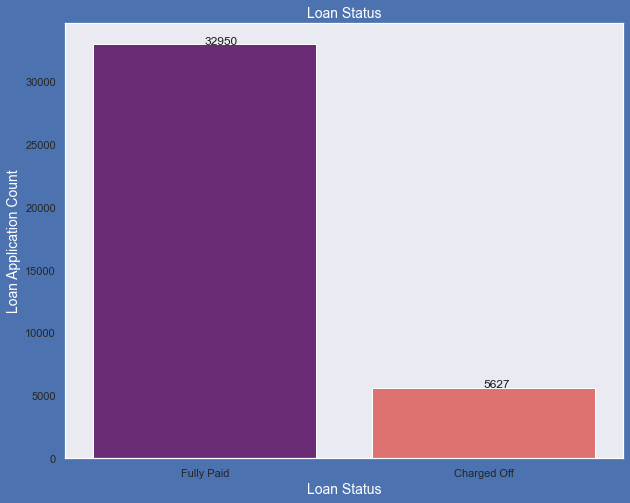

In [29]:
# Univariate Analysis -Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=dfLoan,palette='magma')
ax.set_title('Loan Status',fontsize=14,color='white')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'white') 

# Display count of values above bars
s=dfLoan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

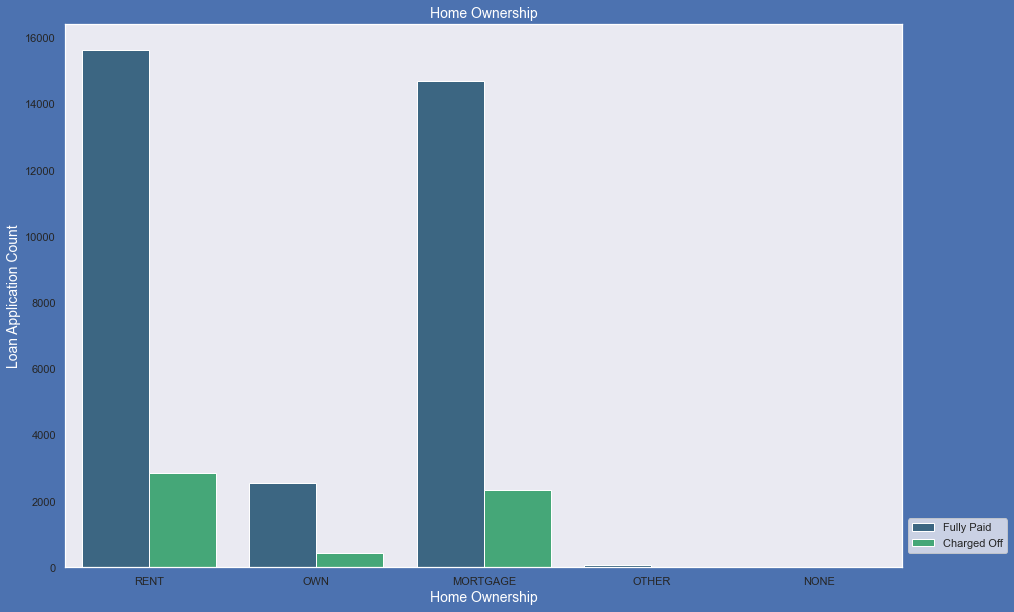

In [30]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(15,10),facecolor='b')
ax = sns.countplot(x="home_ownership",data=dfLoan,hue='loan_status',palette='viridis')
ax.legend(bbox_to_anchor=(1, 0.1))
ax.set_title('Home Ownership',fontsize=14,color='White')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'White')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'White')      
plt.show()

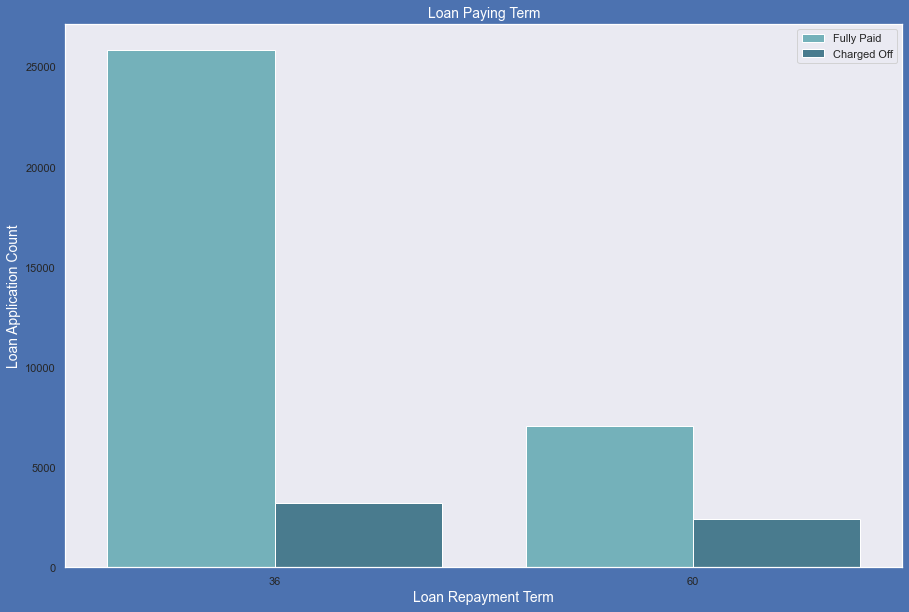

In [31]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(15,10),facecolor='b')
ax = sns.countplot(x="term",data=dfLoan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='White')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'White')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'White')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

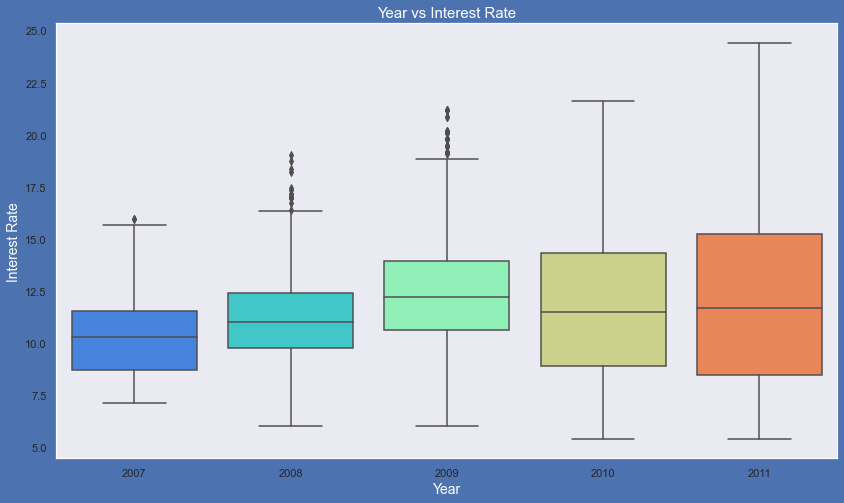

In [32]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =dfLoan,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='White')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'White')
ax.set_xlabel('Year',fontsize=14,color = 'White')
plt.show()

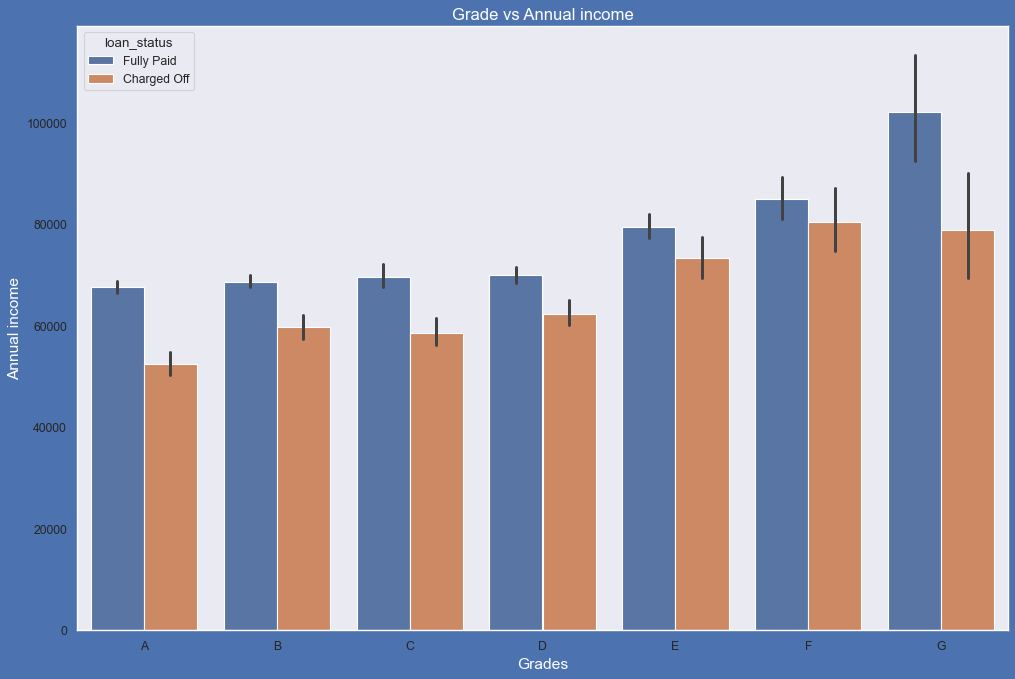

In [33]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(15,10), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=dfLoan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='White')
ax.set_ylabel('Annual income',fontsize=14,color = 'White')
ax.set_xlabel('Grades',fontsize=14,color = 'White')
plt.show()

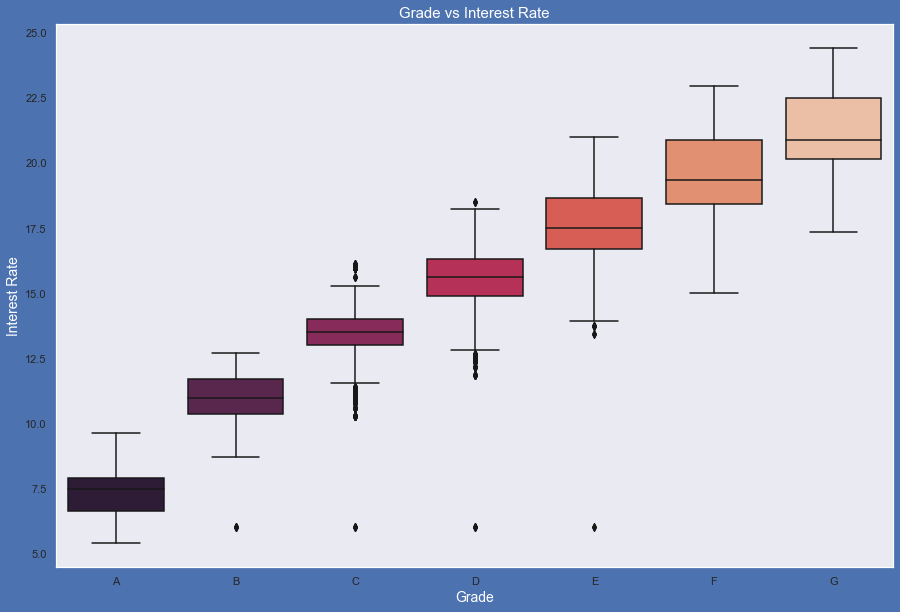

In [34]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(15,10),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =dfLoan,palette='rocket',order='ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='White')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'White')
ax.set_xlabel('Grade',fontsize=14,color = 'White')
plt.show()

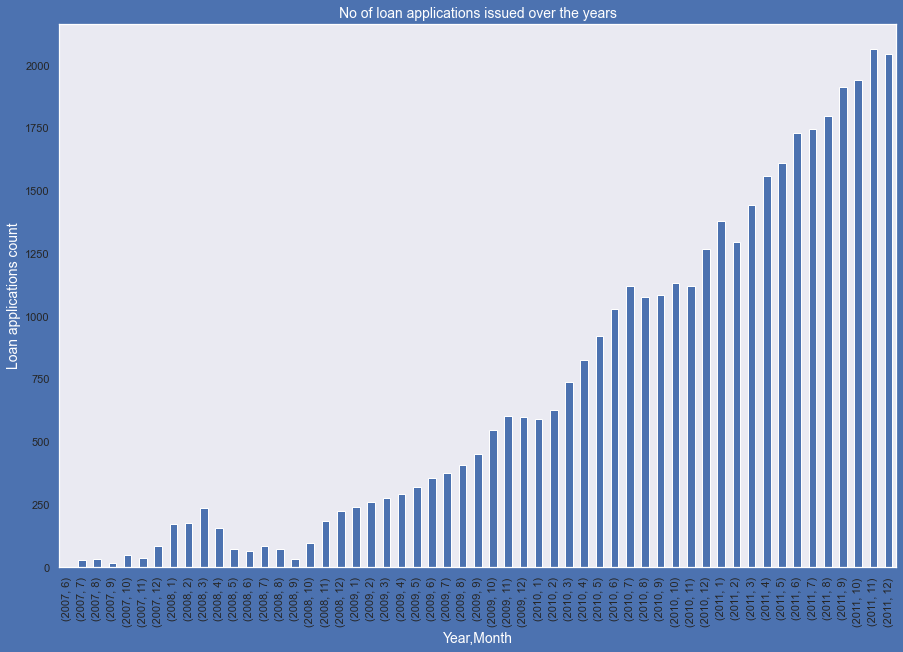

In [35]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(15,10),facecolor='b')
dfLoan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()